**Instituto Tecnológico de Aeronáutica – ITA**

**Visão Computacional - CM-203**

**Professores:** 

Arthur Fernandes de Morais

Elcio Hideiti Shiguemori

Gabriel Adriano de Melo

Marcos Ricardo Omena de Albuquerque Maximo

**Orientações padrão:**

Antes de você entregar o Lab, tenha certeza de que tudo está rodando corretamente (sequencialmente): Primeiro, **reinicie o kernel** (`Runtime->Restart Runtime` no Colab ou `Kernel->Restart` no Jupyter), depois rode todas as células (`Runtime->Run All` no Colab ou `Cell->Run All` no Jupyter) e verifique que as células rodem sem erros, principalmente as de correção automática que apresentem os `assert`s.

É muito importante que vocês não apaguem as células de resposta para preenchimento, isto é, as que contenham o `ESCREVA SEU CÓDIGO AQUI` ou o "ESCREVA SUA RESPOSTA AQUI", além das células dos `assert`, pois elas contém metadados com o id da célula para os sistemas de correção automatizada e manual. O sistema de correção automatizada executa todo o código do notebook, adicionando testes extras nas células de teste. Não tem problema vocês criarem mais células, mas não apaguem as células de correção. Mantenham a solução dentro do espaço determinado, por organização. Se por acidente acontecer de apagarem alguma célula que deveria ter a resposta, recomendo iniciar de outro notebook (ou dar um `Undo` se possível), pois não adianta recriar a célula porque perdeu o ID.

Os Notebooks foram programados para serem compatíveis com o Google Colab, instalando as dependências necessárias automaticamente a baixando os datasets necessários a cada Lab. Os comandos que se inicial por ! (ponto de exclamação) são de bash e também podem ser executados no terminal linux, que justamente instalam as dependências.

---

# Laboratório de Redes Neurais

O foco desse laboratório é exercitar conceitos de redes neurais do tipo [Multilayer Perceptron](https://en.wikipedia.org/wiki/Multilayer_perceptron) se utilizando do framework [fast.ai](https://www.fast.ai/)

Para isso vejamos uma das principais estruturas de dados ao se tratar de algorítmos e frameworks de desenvolvimento de IA: Os tensores

In [4]:
# Se for executar localmente, tenha as seguintes bibliotecas instaladas
# !pip install fastai==2.7.9 pandas

from fastai.vision.all import *
from fastai.basics import *
from fastai.data.transforms import RandomSplitter
import torch
import numpy as np
import pandas as pd

torch.manual_seed(442)
np.random.seed(442)
plt.rc('figure', dpi=90)

In [5]:
def custom_set_seed(dls,x=442):
    random.seed(x)
    dls.rng.seed(x) 
    np.random.seed(x)
    torch.manual_seed(x)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(x)

### Manipulações básicas de tensores
O fast.ai foi desenhado se utilizando um framework de inteligência artificial bastante utilizado, o Pytorch, que historicamente foi desenvolvido pelo facebook (Meta) mas que [recentemente foi transferido para a Linux Foundation.](https://www.linuxfoundation.org/blog/blog/welcoming-pytorch-to-the-linux-foundation?hss_channel=lcp-208777&utm_campaign=PyTorchLaunch_Q3_2022&utm_content=220956836&utm_medium=social&utm_source=linkedin)

Um tensor PyTorch é similar a um array NumPy. 

No entanto ele precisa usar um único tipo numérico básico para todos os componentes. Consequentemente, um tensor não é tão flexível quanto uma matriz de matrizes. Por exemplo, um tensor PyTorch não pode ter a forma de uma [matriz irregular](https://en.wikipedia.org/wiki/Irregular_matrix). É sempre uma estrutura retangular multidimensional.

Assim, uma atribuição como essa, não é possível.

```
data = [[2,3],[4,5,6]]
tns = tensor(data)
```

Vejamos a seguir algumas operações básicas com tensores. 

Caso necessário consulte a documentação do pytorch sobre tensores https://pytorch.org/docs/stable/tensors.html

Atribuição a partir de tupla:

In [6]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

In [7]:
arr

array([[1, 2, 3],
       [4, 5, 6]])

In [8]:
tns

tensor([[1, 2, 3],
        [4, 5, 6]])

Acessando dados em um tensor:

In [9]:
print(tns[:,1])
print(tns[1,1:2])

tensor([2, 5])
tensor([5])


Realizando operações aritméticas com tensores:

In [10]:
print(tns+1)
print(tns-1)
print(tns*1.5)
print(tns/2)

tensor([[2, 3, 4],
        [5, 6, 7]])
tensor([[0, 1, 2],
        [3, 4, 5]])
tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])
tensor([[0.5000, 1.0000, 1.5000],
        [2.0000, 2.5000, 3.0000]])


### Carregando imagens como tensores

Com o fast.ai é possível carregar datasets de uma maneira muito fácil. 

Uma lista de datasets é disponível como atributos da classe URLs como é possível ver abaixo:

https://docs.python.org/3/library/functions.html#dir

In [11]:
dir(URLs)

['ADULT_SAMPLE',
 'AG_NEWS',
 'AMAZON_REVIEWS',
 'AMAZON_REVIEWS_POLARITY',
 'BIWI_HEAD_POSE',
 'BIWI_SAMPLE',
 'CALTECH_101',
 'CAMVID',
 'CAMVID_TINY',
 'CARS',
 'CIFAR',
 'CIFAR_100',
 'COCO_SAMPLE',
 'COCO_TINY',
 'CUB_200_2011',
 'DBPEDIA',
 'DOGS',
 'FLOWERS',
 'FOOD',
 'GOOGLE',
 'HUMAN_NUMBERS',
 'IMAGENETTE',
 'IMAGENETTE_160',
 'IMAGENETTE_320',
 'IMAGEWANG',
 'IMAGEWANG_160',
 'IMAGEWANG_320',
 'IMAGEWOOF',
 'IMAGEWOOF_160',
 'IMAGEWOOF_320',
 'IMDB',
 'IMDB_SAMPLE',
 'LOCAL_PATH',
 'LSUN_BEDROOMS',
 'MACAQUES',
 'MDL',
 'ML_100k',
 'ML_SAMPLE',
 'MNIST',
 'MNIST_SAMPLE',
 'MNIST_TINY',
 'MNIST_VAR_SIZE_TINY',
 'MT_ENG_FRA',
 'OPENAI_TRANSFORMER',
 'PASCAL_2007',
 'PASCAL_2012',
 'PETS',
 'PLANET_SAMPLE',
 'PLANET_TINY',
 'S3',
 'S3_AUDI',
 'S3_COCO',
 'S3_IMAGE',
 'S3_IMAGELOC',
 'S3_MODEL',
 'S3_NLP',
 'SIIM_SMALL',
 'SOGOU_NEWS',
 'TCGA_SMALL',
 'URL',
 'WIKITEXT',
 'WIKITEXT_TINY',
 'WT103_BWD',
 'WT103_FWD',
 'YAHOO_ANSWERS',
 'YELP_REVIEWS',
 'YELP_REVIEWS_POLARITY',
 

Vamos carregar um dataset com um subconjunto dos dados do famoso dataset do [MNIST](https://en.wikipedia.org/wiki/MNIST_database). 

Para isso basta utilizar o método ```untar_data()```.

https://docs.fast.ai/data.external.html#untar_data

In [12]:
path = untar_data(URLs.MNIST_SAMPLE)

In [13]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/valid')]

Uma forma de inicializar um tensor com os pixels correspondentes de uma dada imagem é se utilizar do método ```open()``` e atribuir o objeto ao argumento do método ```tensor()```:

In [14]:
threes = (path/'train'/'3').ls().sorted()
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [15]:
im3_t = tensor(im3)
im3_t

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255,
         254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  4

Vejamos, em uma escala de cinza, o que representa uma dada imagem nesse dataset. 

Perceba que normalizamos os valores de cada pixel da imagem original (entre 0 e 255) para valores entre 0 e 1.

In [16]:
df = pd.DataFrame(im3_t/255)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113725,0.588235,0.764706,0.996078,1.000000,0.996078,0.690196,0.756863,0.588235,0.376471,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.188235,0.650980,0.878431,0.992157,0.992157,0.917647,0.768627,0.992157,0.992157,0.992157,0.992157,0.913725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.364706,0.956863,0.976471,0.992157,0.733333,0.180392,0.039216,0.031373,0.015686,0.039216,0.760784,0.992157,0.992157,0.913725,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.419608,0.992157,0.992157,0.901961,0.188235,0.000000,0.000000,0.000000,0.000000,0.000000,0.752941,0.992157,0.992157,0.611765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.011765,0.078431,0.078431,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.168627,0.878431,0.992157,0.960784,0.290196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Caso seja necessário se utilize do método print_image_with_grad() abaixo para visualizar um grid de pixels como a imagem acima **para um dado tensor** previamente inicializado:

In [17]:
def print_image_with_grad(image_tensor: tensor):
    """
    Realiza o print de um tensor utilizando um grid em escala de cinza

    Args:
        image (tensor): tensor a ser "printado"
    """
    df = pd.DataFrame(image_tensor[:,:])
    df_style = df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')
    display(df_style)

O objeto im3_t é somente uma imagem dos datasets disponíveis e portando tem dimensões 28x28. 

Vamos empilhar todas as imagens de cada um dos datasets (imagens de 3 e imagens de 7). 

Para isso utilizaremos o método ```stack``` do pytorch

https://pytorch.org/docs/stable/generated/torch.stack.html

In [18]:
im3_t.shape

torch.Size([28, 28])

In [19]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [20]:
three_tensors = [tensor(Image.open(image)) for image in threes]
seven_tensors = [tensor(Image.open(image)) for image in sevens]

In [21]:
len(three_tensors)

6131

In [22]:
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255

In [23]:
stacked_threes.shape

torch.Size([6131, 28, 28])

Para exercitar manipulações com tensores calcule uma "imagem média" de cada um dos datasets (tanto de imagens de 3 como imagens de 7).

Cada pixel da imagem resultante na posição (i, j) é a média de todos os pixels com posição (i, j) de cada imagem da pilha de tensores, como consta no exemplo destacado no diagrama abaixo.

Além de poder utilizar operações como as descritas, o pythorch também possui uma série de métodos para simplificar a manipulação com tensores, inclusive com operações de redução: https://pytorch.org/docs/stable/torch.html#reduction-ops

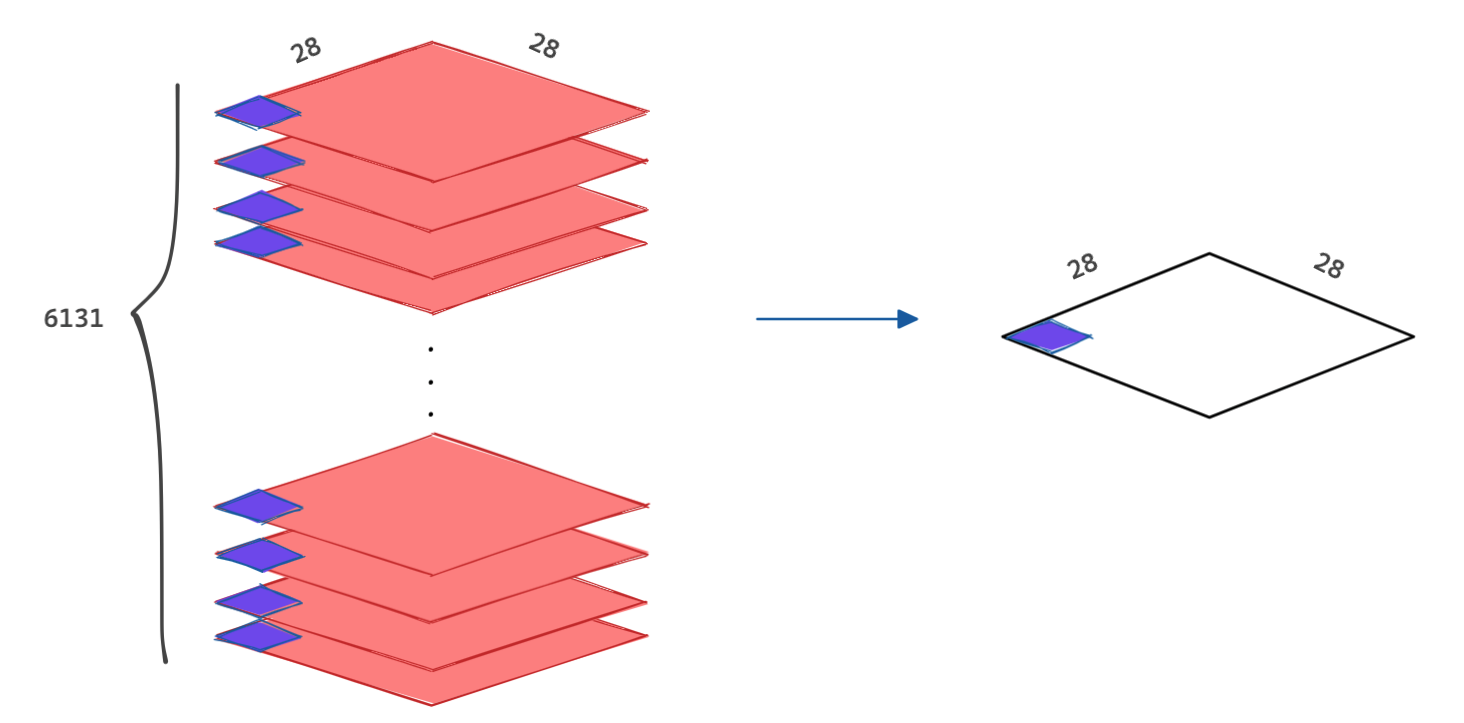

In [24]:
def calculate_average_image_of_number(stacked_num: tensor) -> tensor:
    """
    Reduz todos os pixels de uma pilha de tensores com imagens distintas se 
    utilizando da média de todos os pixels da pilha original
    Args:
        stacked_num (tensor): Tensor com todas as imagens. A primeira dimensão
        representa o número de imagens do tensor

    Returns:
        tensor: Tensor representando uma única imagem a partir da redução das
        imagens disponíveis em stacked_num
    """
    result_tensor = tensor(np.sum([stacked_num[i,:,:] for i in range(len(stacked_num))]))/len(stacked_num)
    return result_tensor

In [25]:
avg_3 = calculate_average_image_of_number(stacked_threes)
avg_7 = calculate_average_image_of_number(stacked_sevens)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [26]:
assert abs(float(avg_3[13][13]) - 0.7671858072280884) < 1e-4 

In [27]:
print_image_with_grad(calculate_average_image_of_number(stacked_threes))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000073,0.000196,0.000234,0.000193,0.000276,0.000262,0.000294,0.000284,0.000157,0.000049,0.000006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000016,0.000487,0.000773,0.001447,0.002979,0.005649,0.009518,0.015693,0.021113,0.024280,0.025964,0.024268,0.020875,0.017108,0.011642,0.007044,0.003994,0.001495,0.000329,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000024,0.000033,0.000156,0.001400,0.005785,0.013664,0.030111,0.055401,0.090316,0.137247,0.183566,0.221279,0.246549,0.249719,0.235358,0.198716,0.150844,0.105427,0.064754,0.032829,0.013352,0.004597,0.000393,0.000002,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000058,0.001520,0.008891,0.027837,0.061064,0.112706,0.186884,0.280246,0.382974,0.480248,0.558778,0.613243,0.623296,0.597718,0.528352,0.421002,0.305758,0.203470,0.117423,0.053793,0.016992,0.003462,0.000259,0.000000,0.000000,0.000000
6,0.000000,0.000007,0.000301,0.005817,0.024498,0.059899,0.120375,0.207547,0.319395,0.435470,0.544472,0.627645,0.685044,0.723960,0.744895,0.744635,0.705014,0.608753,0.479167,0.339493,0.213218,0.108683,0.037335,0.007908,0.000823,0.000000,0.000000,0.000000
7,0.000000,0.000324,0.000454,0.009741,0.037895,0.082921,0.153821,0.241572,0.337672,0.426819,0.491617,0.528419,0.544753,0.558834,0.586414,0.627511,0.651261,0.621129,0.528498,0.407529,0.270252,0.144118,0.053465,0.011405,0.001049,0.000000,0.000000,0.000000
8,0.000000,0.000126,0.000540,0.011943,0.040899,0.078775,0.134423,0.194570,0.250744,0.294887,0.316930,0.317467,0.311333,0.321824,0.366342,0.452059,0.537601,0.570685,0.526008,0.417370,0.277698,0.147913,0.056850,0.011186,0.000565,0.000000,0.000000,0.000000
9,0.000000,0.000135,0.000646,0.009146,0.029371,0.054969,0.089482,0.119549,0.141732,0.155845,0.161737,0.161483,0.169576,0.205845,0.292122,0.418712,0.530470,0.574464,0.516992,0.388451,0.243504,0.119843,0.044328,0.008707,0.000116,0.000040,0.000000,0.000000


Utilizando os métodos ```abs()``` e ```mean()``` implemente uma função que calcula a distância de um número e o número médio correspondente. 

Para isso utilize a norma L1, ou seja retorne a média do valor absoluto das diferenças entre cada pixel de uma dada imagem (current_tensor) e a imagem média correspondente (avg_3 ou avg_7)

In [28]:
def calculate_distance_to_average(current_tensor, avg_tensor) -> tensor:
    """
    Calcula distância de um dado tensor (current_tensor) para um tensor que 
    representa a média previamente calculada dos tensores para um dado número
    do MNIST (avg_tensor), utilizando a norma L1.
    Args:
        current_tensor (tensor): Tensor atual
        avg_tensor (tensor): Tensor que representa a media

    Returns:
        tensor: Distância para media
    """
    dists = torch.abs(current_tensor-avg_tensor)
    result = torch.sum(dists)
    return result

Com o método ```calcula_distancia_para_media``` é possível implementar um classificador muito simples que decide se um dado número é 3 ou não simplesmente analisando se sua distância para um três é menor que sua distância para um 7. 

Nesse sentido, seria possível se utilizar desse método como baseline de um classificador a ser treinado.

In [29]:
def is_3(x: tensor) -> tensor: 
  dist_to_3 = calculate_distance_to_average(x,avg_3)
  dist_to_7 = calculate_distance_to_average(x,avg_7)
  return dist_to_3 < dist_to_7

In [30]:
def get_tensor_from_image(index, image_type, path):
    set_of_images = (path/'train'/image_type).ls().sorted()
    image_data = set_of_images[index]
    image = Image.open(image_data)
    return tensor(image)

In [31]:
assert bool(is_3(get_tensor_from_image(3, '3', path))) == True

--------

## Gradient descent

Relembre que a ideia geral do algoritmo de otimização do Gradient Descent é ajustar os parâmetros iterativamente para minimizar uma função de custo.

Por exemplo, suponha que você esteja perdido nas montanhas em uma névoa densa e você só pode sentir a inclinação do solo abaixo de seus pés. 

Uma boa estratégia para chegar rapidamente ao fundo do vale é descer em direção à encosta mais íngreme. 

Isso é exatamente o que faz Gradient Descent: **mede o gradiente local da função de erro em relação ao vetor de parâmetro θ e vai na direção do gradiente descendente**. 

Quando o gradiente for zero, você atingiu um mínimo.

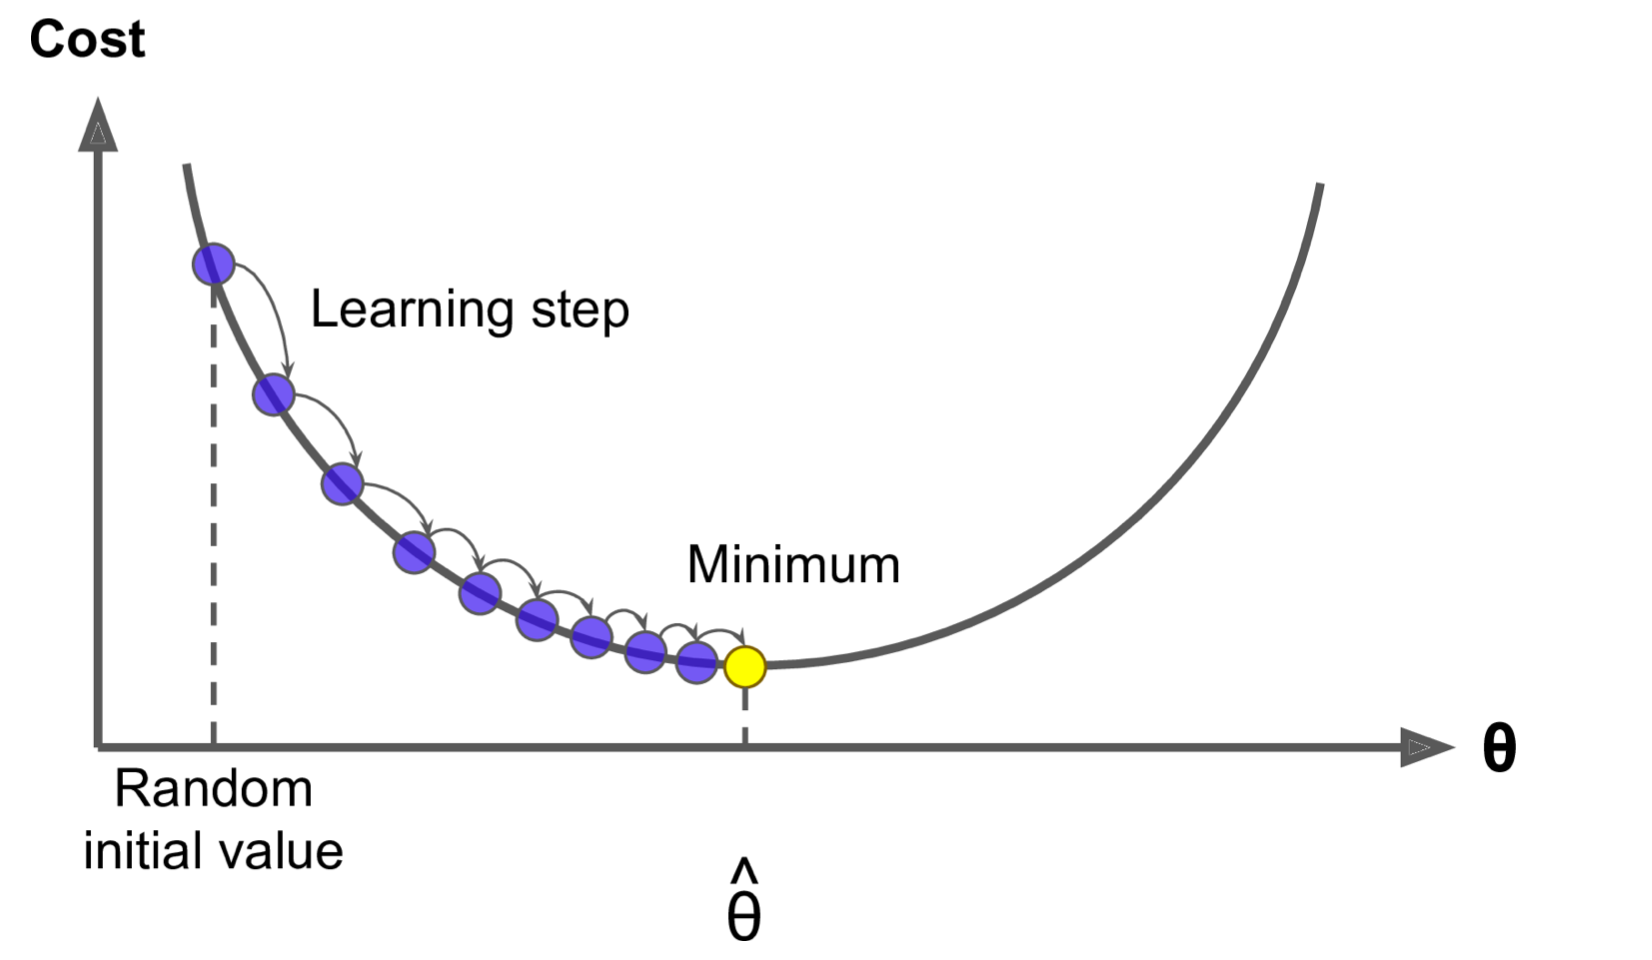

De forma geral, todos os modelos de aprendizado de máquina seguem mais ou menos um ciclo de aprendizado como descrito no diagrama abaixo. 

A estratégia do Gradient Descent é um passo fundamental no processo de aprendizado de algorítmos de Machine Learning.

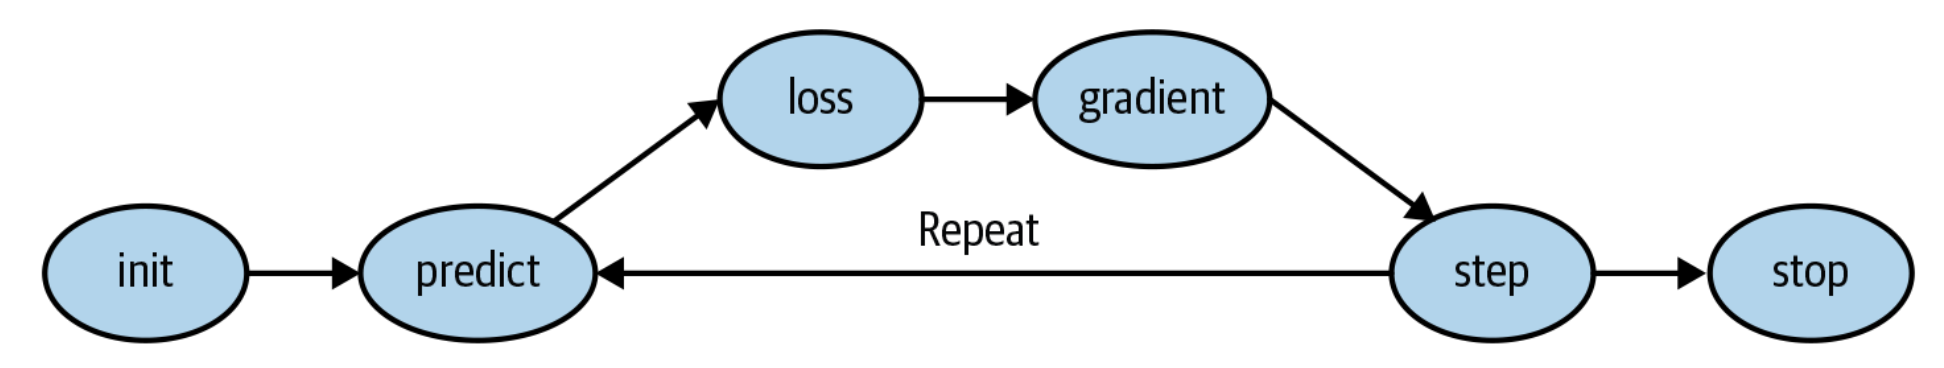

Vejamos como é possível calcular gradientes utilizando de tensores:

Considere uma função f(x) como descrita abaixo.

Para calcular o valor de f'(k) para um dado k utilizamos os métodos ```requires_grad_()``` e ```backward()``` do pytorch.

https://pytorch.org/docs/stable/generated/torch.Tensor.requires_grad_.html

https://pytorch.org/docs/stable/generated/torch.Tensor.backward.html

In [32]:
def f(x): 
  return x**2

xt = tensor(3.).requires_grad_()
yt = f(xt)
yt.backward()

In [33]:
print(f"xt = {xt}\nf'(xt) = {xt.grad}")

xt = 3.0
f'(xt) = 6.0


In [34]:
def p(x):
  return (x**2).sum() 

kt = tensor([3.,4.,10.]).requires_grad_()
ut = p(kt)
ut.backward()
print(f"kt = {kt} \np'(kt) = {kt.grad}")

kt = tensor([ 3.,  4., 10.], requires_grad=True) 
p'(kt) = tensor([ 6.,  8., 20.])


Se utilizando das funções previamente implementadas abaixo é possível definirmos uma função quadrática e um conjunto de pontos em torno dessa função adicionando um ruído a pontos que inicialmente faziam parte do gráfico:

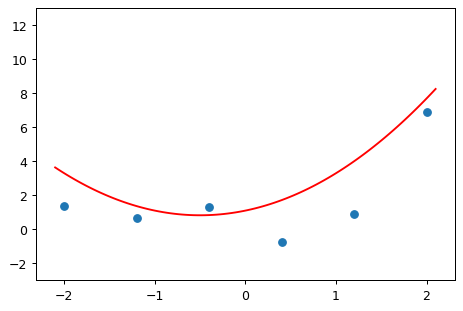

In [35]:
def quad(a, b, c, x): 
  return a*x**2 + b*x + c

def mk_quad(a,b,c): 
  return partial(quad, a,b,c)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)
    
def plot_quad(a, b, c):
    plt.scatter(x,y)
    plot_function(mk_quad(a,b,c), ylim=(-3,13))

def noise(x, scale):
  np.random.seed(442)
  return np.random.normal(scale=scale, size=x.shape)

def add_noise(x, mult, add): 
  return x * (1+noise(x,mult)) + noise(x,add)

x = torch.linspace(-2, 2, steps=6)[:,None]
y = add_noise(f(x), 0.15, 1.5)
plot_quad(a=1.1, b=1.1, c=1.1)

Implemente uma função que retorne o erro absoluto médio (mean absolute error) para a amostra dos pontos em questão.

Ou seja, supondo 5 pontos como descritos no exemplo abaixo, o erro absoluto médio dessa distribuição seria:

```mae = (d1+d2+d3+d4+d5) / 5```

A implementação dessa função é análoga a implementação da função ```calcula_distancia_para_media()``` previamente implementada.

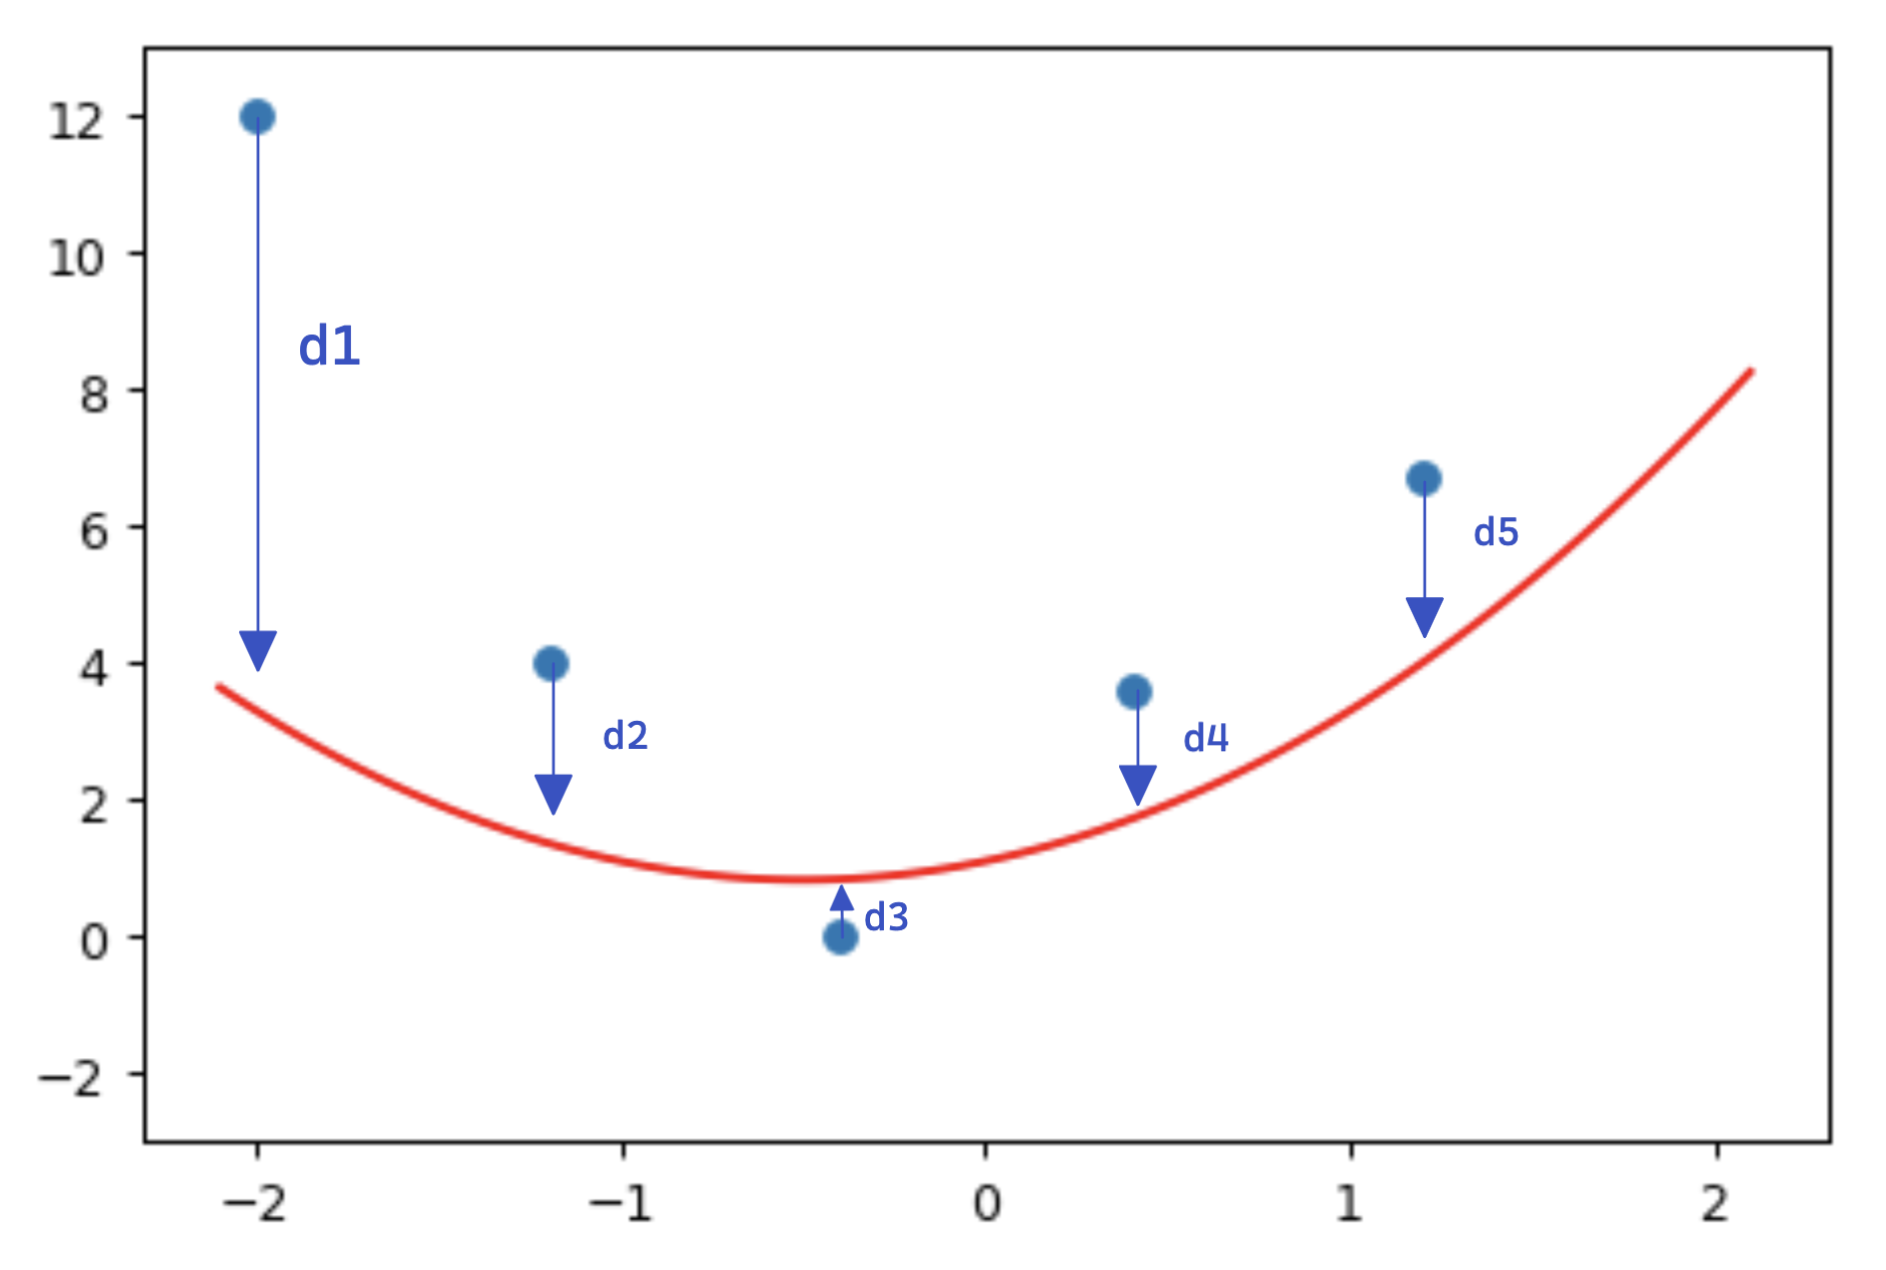

In [36]:
def f(x):
    return 3*x**2 + 2*x + 1

In [37]:
def mae(preds: tensor, acts: tensor) -> tensor:
    """
    Calcula o erro absoluto médio (mean absolute error) entre dois tensores

    Args:
        preds (tensor): tensor previsto
        acts (tensor): tensor atual

    Returns:
        result: tensor com resultado do erro absoluto medio entre os tensores
    """
    result = calculate_distance_to_average(preds, acts)/(preds.shape[0]*preds.shape[1])
    return result

In [38]:
assert abs(float(mae(f(x), y)) - 5.076803694600829) < 1e-4

Uma vez que temos uma função que retorna o erro absoluto médio para uma dada função, podemos implementar uma função que retorna o erro absoluto médio para qualquer função quadrática segundo os parâmetros a, b, c:

```a*x**2 + b*x + c```

In [39]:
def quad_mae(params: list, x: tensor, y: tensor):
    """
    Realiza o cálculo do erro quadrático médio entre os valores obtidos por meio 
    de uma função quadrática definida de acordo com params e aplicada no ponto x
    e os valores de um ponto definido em y.

    Args:
        params (list): 3 parâmetros que definem uma função quadrática
        x (tensor): Pontos a serem analisados pela função quadrática
        y (tensor): Pontos com os valores a serem comparados com os respectivos
        pontos que fazem parte da função quadrática.

    Returns:
        tensor: resultado do erro absoluto medio
    """
    current_f = mk_quad(*params)
    predict = current_f(x)
    actual = y
    result = mae(predict, actual)
    return result

In [40]:
assert abs(float(quad_mae([1.1, 1.1, 1.1], x, y)) - 1.5781371101090995) < 1e-4

Com esses métodos implementados, implemente uma função que realiza uma interação do algorítmo do gradient descent para a função quadrática em questão com parâmetros a=b=c=1.1

Perceba que a função deve ser genérica com relação ao ```loss_function``` 

Nesse caso ```loss_function = quad_mae```

In [41]:
def one_step_gradient(tensor_coefficients, loss_function, x, y, learning_rate=0.1):
    u = tensor_coefficients.requires_grad_()
    loss = loss_function(u,x,y)
    loss.backward()
    tensor_coefficients = tensor_coefficients-learning_rate* u.grad
    return loss, tensor_coefficients

In [42]:
abc = torch.tensor([1.1,1.1,1.1])
loss, abc = one_step_gradient(abc, quad_mae, x, y)
assert abs(float(loss) - 1.5781371101090995) < 1e-4
assert abs(float(abc[0]) - 0.918666660785675) < 1e-4

--------------------------

## Redes Neurais

Os exercícios abaixo se utilizam do dataset Titanic - Machine Learning from Disaster

https://www.kaggle.com/competitions/titanic/data

De acordo com a descrição do desafio do Kaggle, o dataset permite que utilizemos o aprendizado de máquina para criar um modelo que preveja quais passageiros sobreviveram ao naufrágio do Titanic.

### Sem utilizar fast.ai


Caso seja necessário, se você estiver utilizando o Colab, execute a célulca abaixo para realizar o upload do arquivo ```train.csv``` disponibilizado no laboratório para importar o aquivo csv com os dados necessários.

Se não estiver utilizando o Colab, coloque o arquivo ```train.csv``` no mesmo path desse notebook.

Este csv é o mesmo disponível no site da competição do kaggle aqui: https://www.kaggle.com/competitions/titanic/data?select=train.csv

In [43]:
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\r\

In [44]:
path = Path('.')
df = pd.read_csv(path/'train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


A célula abaixo realiza um pré-processamento nos dados e separa os tensores com as variáveis dependentes e independentes.

In [45]:
def data_preparation(dataframe):  
    modes = dataframe.mode().iloc[0]
    dataframe = dataframe.fillna(modes)
    dataframe['LogFare'] = np.log(dataframe['Fare']+1)
    dataframe = pd.get_dummies(dataframe, columns=["Sex","Pclass","Embarked"])
    return dataframe
clean_dataframe = data_preparation(df)

## Atribuindo a variável dependente em um tensor
t_dep = tensor(clean_dataframe.Survived)

##Atribuindo as variáveis independentes em um tensor
added_cols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare'] + added_cols
t_indep = tensor(clean_dataframe[indep_cols].values, dtype=torch.float)

vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals ## o primeiro termo do dataset era dominante para o cálculo de um modelo linear (Age)

Como resultado do preprocessamento temos que dentre as 5 primeiras linhas do dataset 3 passageiros sobreviveram e 2 não:

In [46]:
t_dep[0:5]

tensor([0, 1, 1, 1, 0])

De modo que essas são as variáveis independentes desses 5 passageiros:

In [47]:
t_indep[0:5]

tensor([[0.2750, 0.1250, 0.0000, 0.3381, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 1.0000],
        [0.4750, 0.1250, 0.0000, 0.6859, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000,
         1.0000, 0.0000, 0.0000],
        [0.3250, 0.0000, 0.0000, 0.3507, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 1.0000],
        [0.4375, 0.1250, 0.0000, 0.6395, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 1.0000],
        [0.4375, 0.0000, 0.0000, 0.3530, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000,
         0.0000, 0.0000, 1.0000]])

In [48]:
## Dividindo o dataset entre treino e validação
splits = RandomSplitter(seed=42)(df)
trn_split = splits[0]
val_split = splits[1]

## Separando as variáveis dependentes e independentes dos datasets correspondentes
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]

Considere uma rede neural composta por uma única camada interna de 20 perceptrons como o diagrama abaixo: 

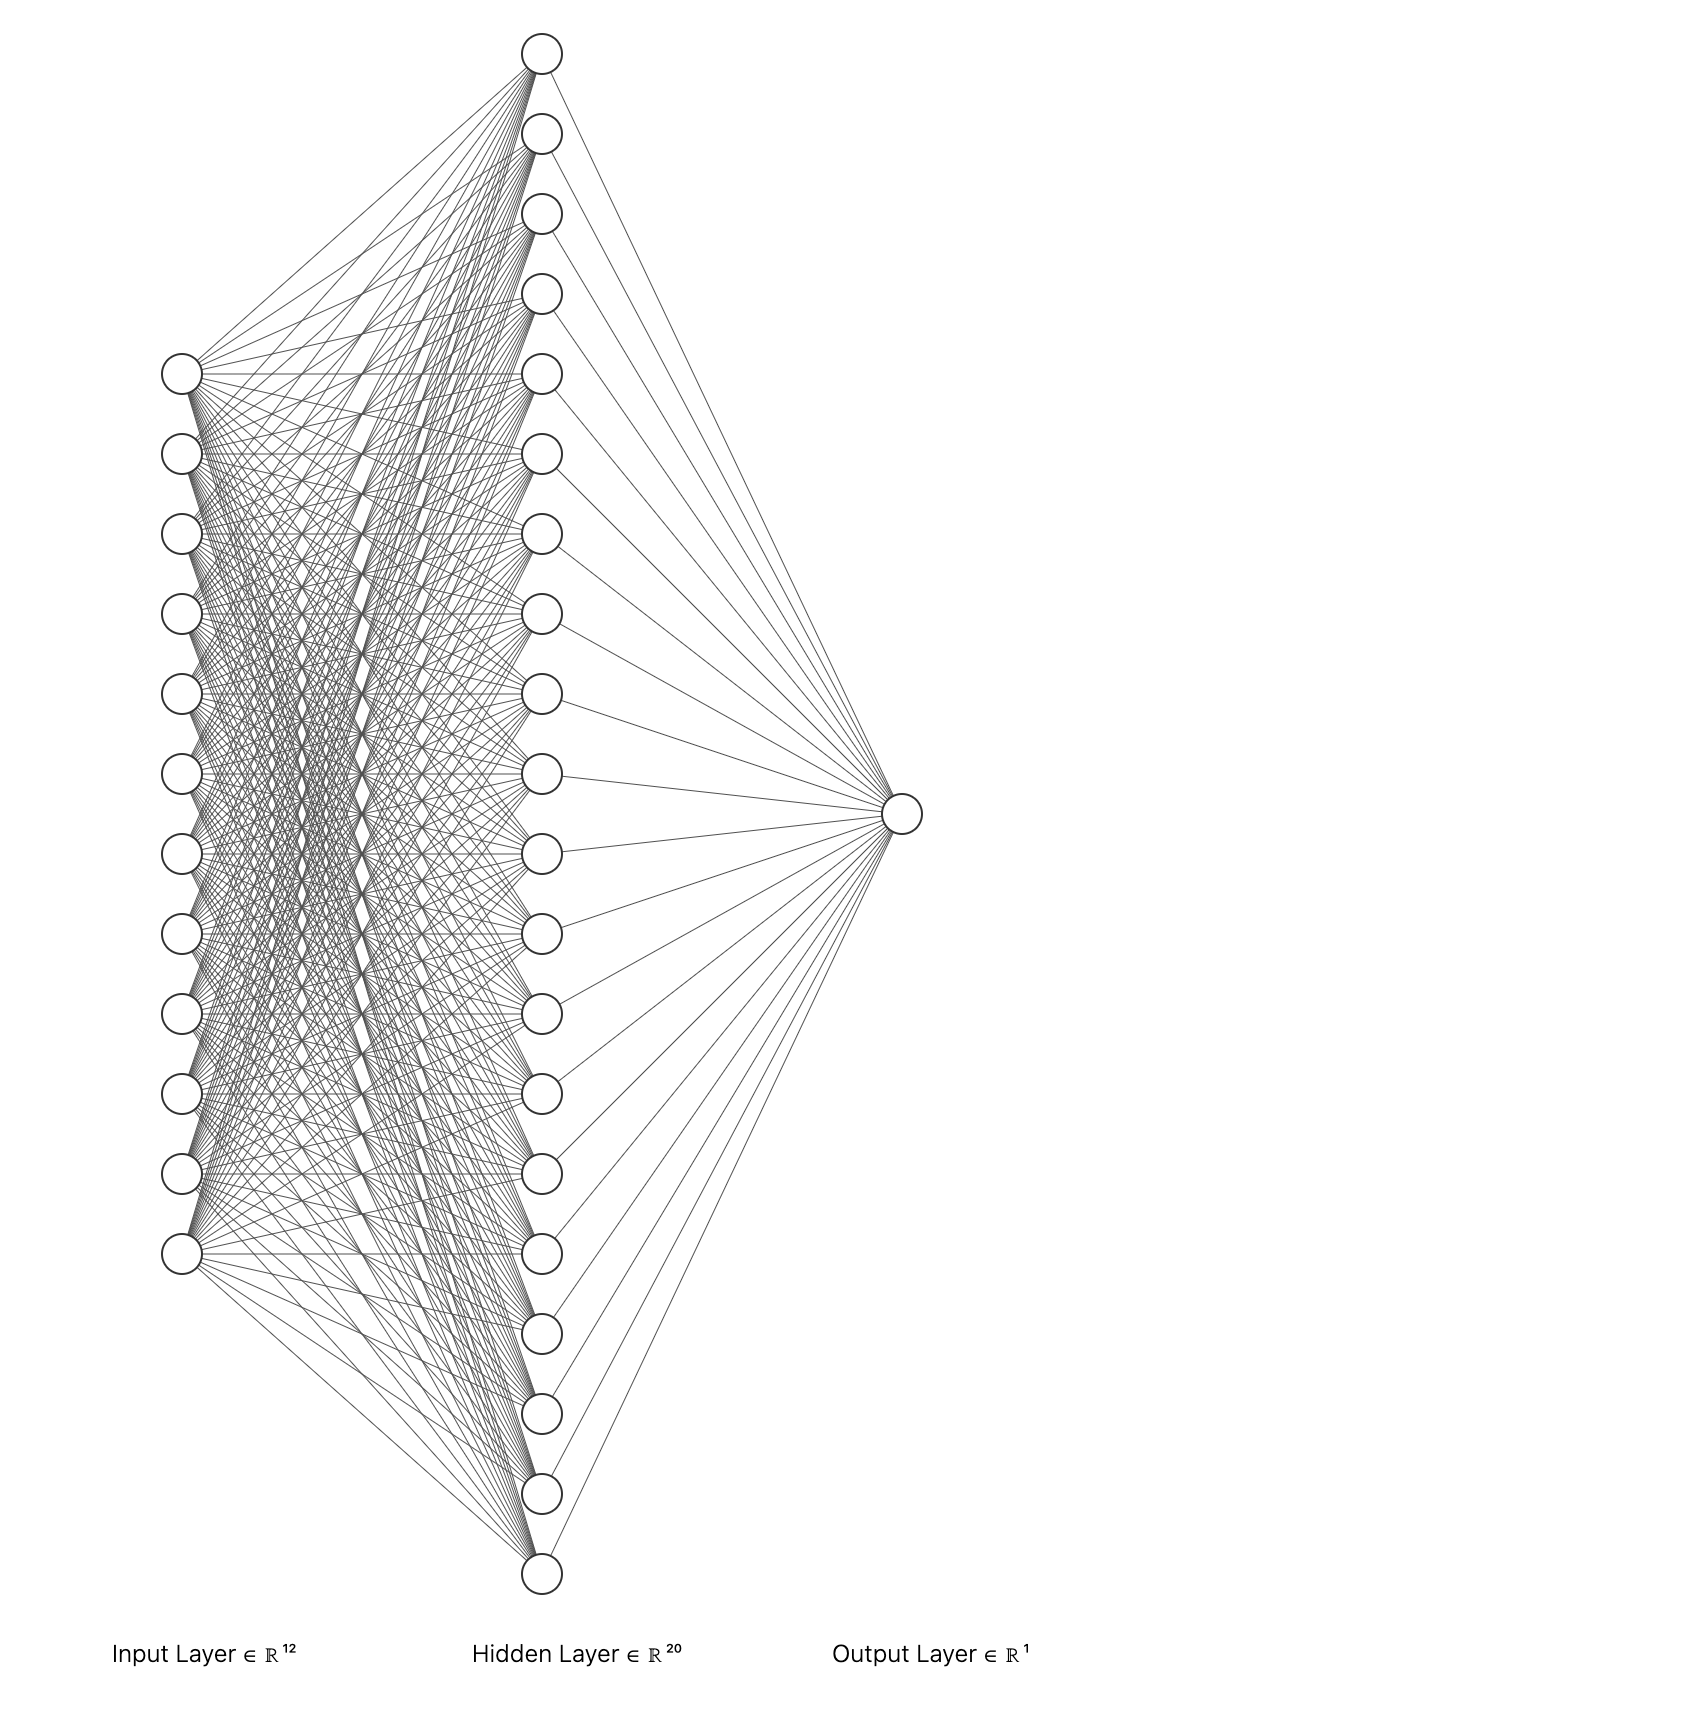

Altere o método ```init_coeffs()``` de modo que seja possível calcular o gradiente com relação aos neurônios da rede.

In [49]:
n_coeff = t_indep.shape[1]

def init_coeffs(n_hidden=20):
    torch.manual_seed(442)
    layer1 = (torch.rand(n_coeff, n_hidden))/n_hidden
    layer2 = torch.rand(n_hidden, 1)
    const = torch.rand(1)[0]
    return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()

Implemente o método ```calc_predictions()```

Observações: 
- Aplique a função Relu ao resultado da multiplicação entre as variáveis independentes (```indeps```) e a camada interna da rede neural (```layer_1```)
- Adicione o tensor ```const``` definido em ```init_coeffs()``` ao resultado da multiplicação entre o resultado da operação anterior e o último neurônio da rede (```layer_2```)
- Aplique a função sigmoid ao resultado da operação anterior


https://pytorch.org/docs/stable/generated/torch.nn.functional.relu.html

https://pytorch.org/docs/stable/generated/torch.sigmoid.html

In [50]:
def calc_predictions(coeffs, indeps):
    """
    Realiza a predição para um dado passageiro que possua um conjunto de 
    variáveis independentes (indeps) de acordo com os pesos atuais 
    da rede neural (coeffs)

    Args:
        coeffs (tuple): Contém os pesos da rede neural: Tupla de tensores
        indeps (tensor): Variáveis independentes de um dado passageiro

    Returns:
        tensor: Predição. Output da função sigmoid.
    """
    layer_1,layer_2,const = init_coeffs()
    res = torch.relu(indeps@layer_1)
    res = torch.sigmoid(res@layer_2+const)
    return res

In [51]:
def calc_loss(coeffs, var_indeps, var_deps):
  current_predictions = calc_predictions(coeffs, var_indeps)
  absolute_diff = torch.abs(current_predictions - var_deps)
  mean_absolute_diff = absolute_diff.mean()
  return mean_absolute_diff

def one_epoch(current_coeffs_for_epoch, lr):
    loss = calc_loss(current_coeffs_for_epoch, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): 
        for layer in current_coeffs_for_epoch:
          layer.sub_(layer.grad*lr)
          layer.grad.zero_()
    return current_coeffs_for_epoch, loss

def train_model(epochs=30, lr=2):
    coeffs = init_coeffs()
    loss_history = []
    for i in range(epochs):
      coeffs, current_loss = one_epoch(coeffs, lr=lr)
      loss_history.append(current_loss)
    return coeffs, loss_history

Implemente o método ```acc()``` para calcular a acurácia da rede para um dado conjunto de pesos (```coeffs```). 

Considere que o treshold de decisão é 0.5, ou seja, se a predição para um dado passageiro (resultado do método ```calc_predictions```) for maior que 0.5 deve-se considerar que esse passageiro é sobrevivente. Caso contrário, não sobrevivente.

In [52]:
def acc(val_dep, val_indep, coeffs): 
    """
    Calcula acurácia do modelo obtido com rede neural previamente definida
    Args:
        val_dep (tensor): Variáveis dependentes
        val_indep (tensor): Variáveis independentes
        coeffs (tuple): Contém os pesos da rede neural: Tupla de tensores

    Returns:
        tensor: Acurácia do modelo
    """
    pred = calc_predictions(coeffs,val_indep)
    result =(val_dep.bool()==(pred>=0.5)).double().mean()
    return result

In [53]:
last_coeffs, loss_history = train_model()

TypeError: ignored

In [54]:
first_coeffs = init_coeffs()

In [55]:
assert abs(float(acc(val_dep, val_indep, first_coeffs)) - 0.40449437499046326) < 1e-4

### Utilizando fast.ai


A biblioteca do fast.api pode ser dividida em várias camadas, como mostra o diagrama abaixo

Dentre essas camadas, iremos utilizar via API do fast.ai a aplicação ```Tabular``` e os ```Learners```


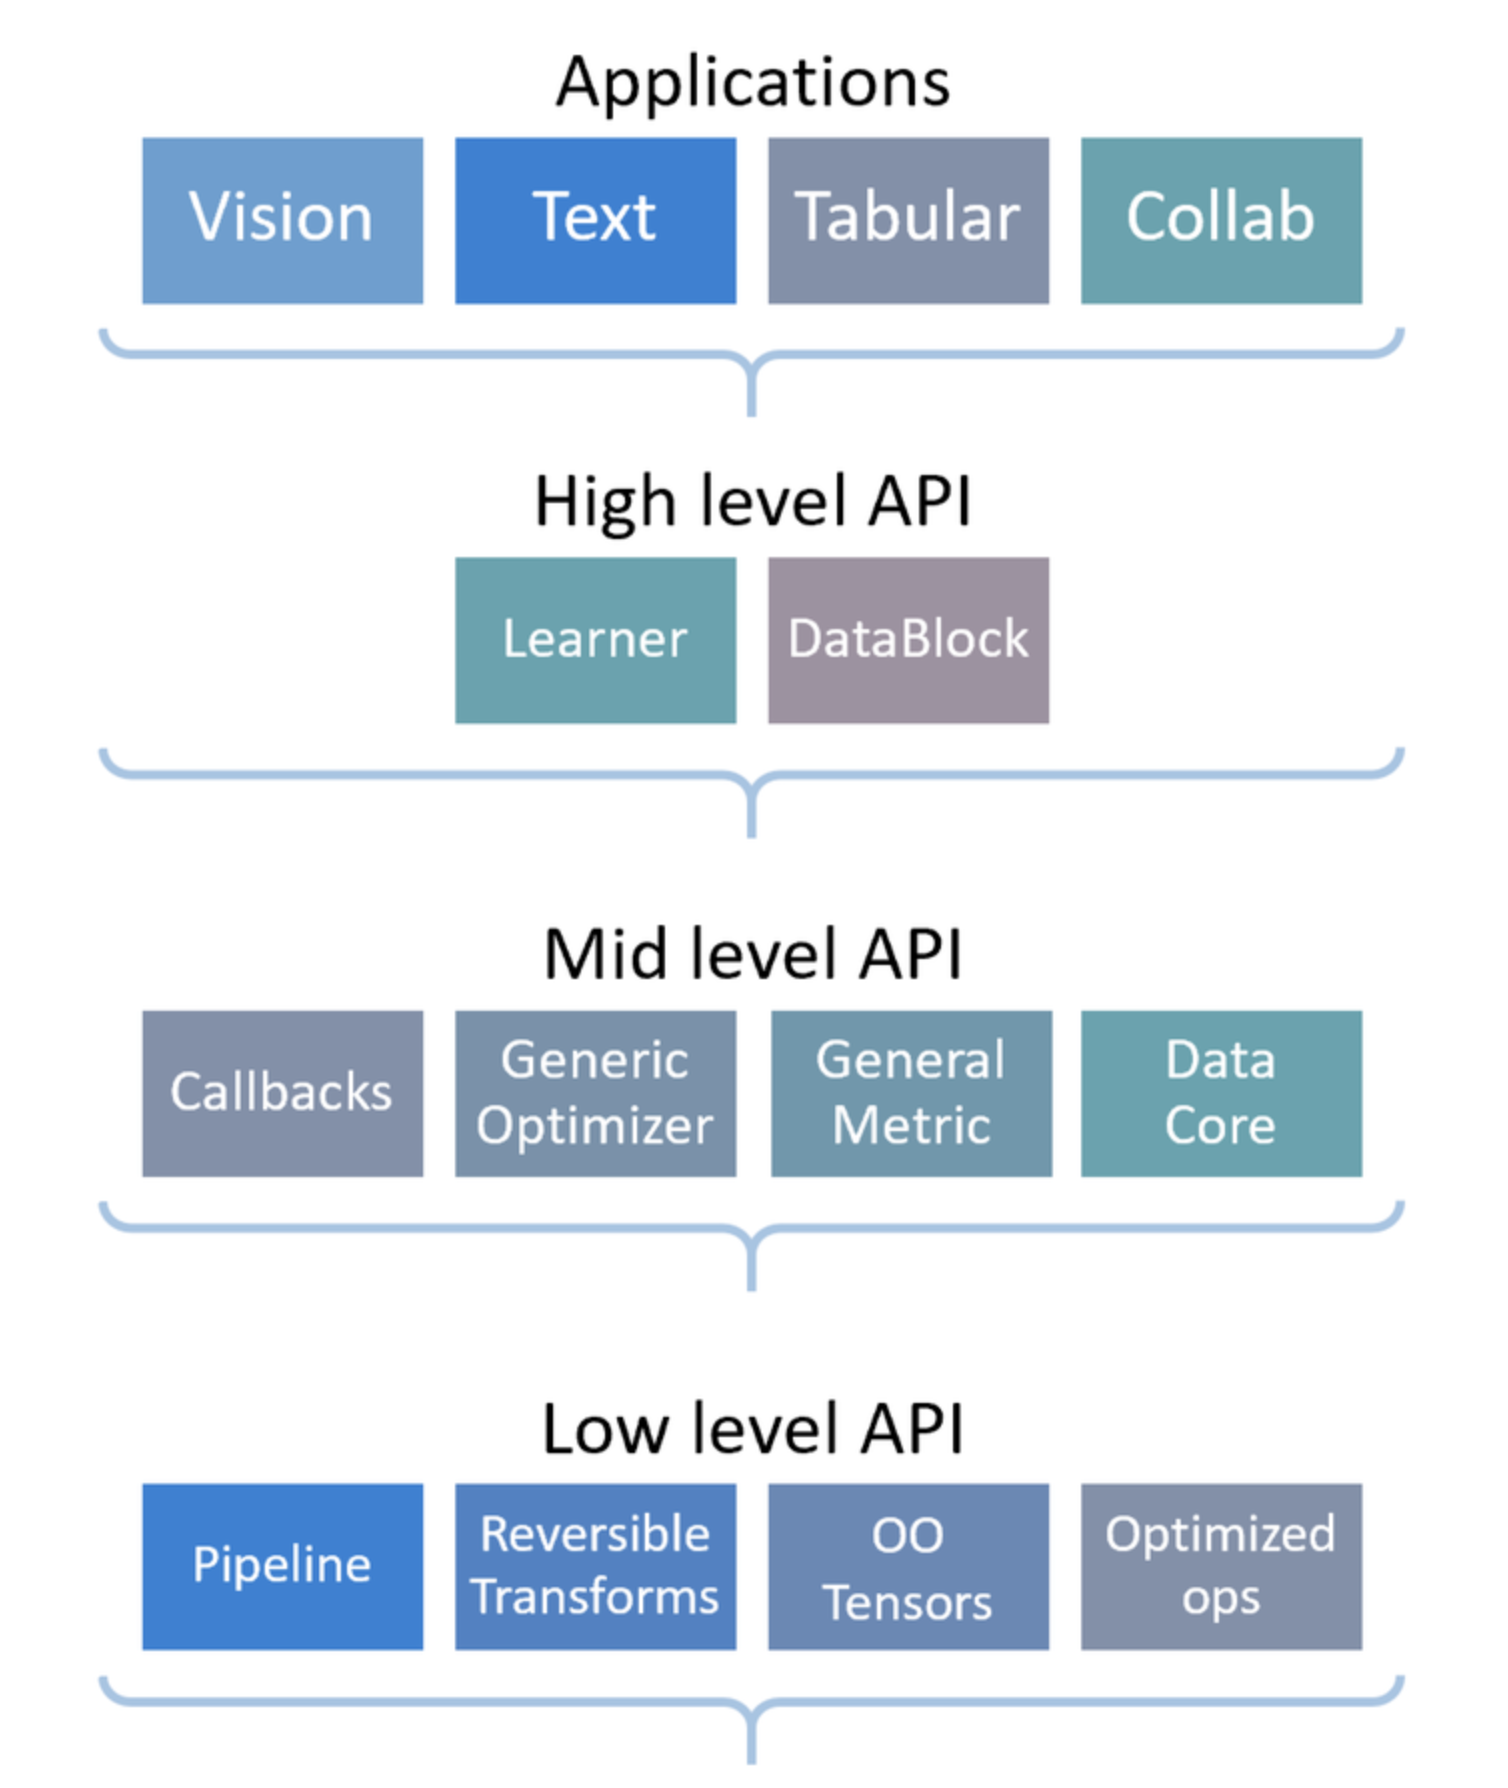

Com o fast.ai conseguimos simplificar vários passos do treinamento de modelos de aprendizado de máquina.

Vejamos um exemplo com o conjunto de dados [Adult Dataset](https://archive.ics.uci.edu/ml/datasets/Adult).

Com esse conjunto de dados vamos tentar inferir se uma dada pessoa ganha mais que $50k por ano se utilizando de dados gerais.

In [56]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')
df.iloc[:2]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k


Para simplificar a etapa de processamento de dados para dados em forma de tabelas, o fast.ai disponibiliza um objeto chamado [TabularPandas](https://docs.fast.ai/tabular.core.html#tabularpandas)

Assim, descrevendo quais são as variáveis categóricas e numéricas, juntamente com uma lista de processadores de dados tabulares, [TabularProc](https://docs.fast.ai/tabular.core.html#tabularproc) temos um objeto com os dados pre-processados.

In [57]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

tabular_pandas_object = TabularPandas(
      df,
      procs=[Categorify, FillMissing,Normalize],
      cat_names = [
          'workclass',
          'education',
          'marital-status',
          'occupation',
          'relationship',
          'race'
      ],
      cont_names = ['age', 'fnlwgt', 'education-num'],
      y_names='salary',
      splits=splits
    )

In [58]:
type(tabular_pandas_object)

fastai.tabular.core.TabularPandas

In [59]:
tabular_pandas_object.xs.iloc[:2]

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num
30969,5,12,5,8,3,5,1,-1.214283,0.103706,-0.418683
20194,5,10,1,13,2,5,1,-0.264223,-0.683726,1.150507


Uma vez com esse objeto inicializado podemos utilizar um outro objeto do fast.ai que simplifica os próximos passos de treino e validação dos nossos modelos: [O DataLoaders](https://docs.fast.ai/data.core.html#dataloaders)

In [60]:
dls = tabular_pandas_object.dataloaders(bs=64)
dls.show_batch()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Some-college,Never-married,Other-service,Own-child,White,False,21.0,170107.999470,10.0,<50k
1,Private,HS-grad,Never-married,Handlers-cleaners,Not-in-family,White,False,22.0,305465.994447,9.0,<50k
2,?,HS-grad,Divorced,?,Unmarried,Black,False,31.0,283530.997036,9.0,<50k
3,Private,Bachelors,Married-civ-spouse,Tech-support,Husband,White,False,34.0,345359.997596,13.0,<50k
4,Private,HS-grad,Never-married,Other-service,Own-child,White,False,20.0,125009.997838,9.0,<50k
5,Private,HS-grad,Married-civ-spouse,Other-service,Husband,White,False,43.0,175224.000595,9.0,<50k
6,Private,10th,Divorced,Sales,Not-in-family,White,False,45.0,128735.997233,6.0,<50k
7,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,False,44.0,45092.999947,9.0,<50k
8,?,Assoc-voc,Married-civ-spouse,?,Husband,White,False,51.0,69328.002956,11.0,>=50k
9,Private,Some-college,Divorced,Machine-op-inspct,Not-in-family,White,False,42.0,37869.005876,10.0,<50k


Utilizando os métodos [tabular_learning](https://docs.fast.ai/tabular.learner.html#tabular_learner) e [fit_one_cycle](https://docs.fast.ai/callback.schedule.html#learner.fit_one_cycle) podemos realizar um treinamento simples:

In [61]:
custom_set_seed(dls)
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.363575,0.364623,0.828317,00:05


----------

Vamos analisar de novo o problema de criar um modelo para tentar inferir um sobrevivente do Titanic.

In [62]:
path = Path('.')
df = pd.read_csv(path/'train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [63]:
splits = RandomSplitter(seed=42)(df)

Implemente o método ```initialize_dls()``` que, utilizando o [TabularPandas](https://docs.fast.ai/tabular.core.html#tabularpandas), inicializa o objeto necessário para o treinamento do modelo com fast.ai

Obervações:
- Como variáveis categóricas considere ["Sex","Pclass","Embarked"]
- Como variáveis numéricas considere ['Age', 'SibSp', 'Parch']


In [87]:
def initialize_dls() -> TabularPandas:
    tabular_pandas = None
    tabular_pandas = TabularPandas(
      df,
      procs=[Categorify, FillMissing,Normalize],
      cat_names = ['Sex','Pclass','Embarked'],
      cont_names =  ['Age', 'SibSp', 'Parch'],
      y_names='Survived',
      splits=splits,
      y_block=CategoryBlock
    )
    return tabular_pandas.dataloaders(path=".")

In [88]:
dls = initialize_dls()

Utilizando o método [tabular_learner](https://docs.fast.ai/tabular.learner.html#tabular_learner) implemente o método ```initialize_tl()```

In [89]:
def initialize_learning(tabular_pandas) -> Learner:
    current_learning = tabular_learner(tabular_pandas)
    return current_learning

Assim, utilizando os métodos ```lr_find``` e ```fit``` é possível realizarmos um treinamento do nosso classificador.

Para saber mais sobre o método lr_find() veja: 
- https://www.jeremyjordan.me/nn-learning-rate/
- https://stackoverflow.com/questions/61172627/choosing-the-learning-rate-using-fastais-learn-lr-find

epoch,train_loss,valid_loss,time
0,0.691655,0.659388,00:00
1,0.644450,0.628222,00:00
2,0.585980,0.541087,00:00
3,0.544865,0.469124,00:00
4,0.515232,0.445559,00:00


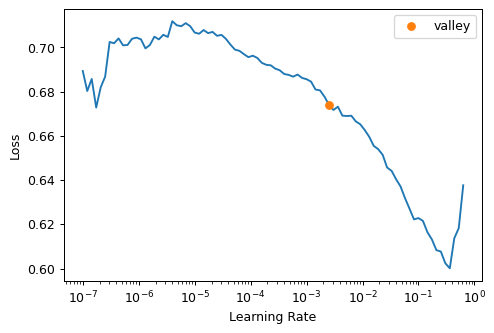

In [90]:
custom_set_seed(dls)
learn = initialize_learning(dls)
lr = learn.lr_find()
learn.fit(5, lr=lr.valley)

In [91]:
dls = initialize_dls()
custom_set_seed(dls)
learn = initialize_learning(dls)
row, clas, probs = learn.predict(df.iloc[0])
assert int(clas) == 0
assert abs(float(probs[0]) - 0.5219040513038635) < 1e-4